In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd

Global seed set to 0


In [2]:
rna1 = sc.read('../../data/trimodal_neurips/rna_hvg_cite.h5ad')
rna1

AnnData object with n_obs × n_vars = 90261 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'GEX_X

In [3]:
rna2 = sc.read('../../data/trimodal_neurips/rna_hvg_multiome.h5ad')
rna2

AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'GEX_X

In [4]:
atac = sc.read('../../data/trimodal_neurips/atac_hvf_muon.h5ad')
atac

AnnData object with n_obs × n_vars = 69249 × 20000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'log1p', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'binary', 'counts', 'cpm', 'tf-idf-binary', 'tf-idf-counts'

In [5]:
adt = sc.read('../../data/trimodal_neurips/adt.h5ad')
adt

AnnData object with n_obs × n_vars = 90261 × 134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
np.sum(rna1.obs_names != adt.obs_names)

0

In [7]:
np.sum(rna2.obs_names != atac.obs_names)

0

In [8]:
np.max(rna1.layers['counts'])

35451.0

In [9]:
np.max(rna2.layers['counts'])

7322.0

In [10]:
np.max(adt.X)

7.874281

In [11]:
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna1, rna2], [None, atac], [adt, None]],
    groups = [[0, 1], [0, 1], [0, 1]],
    layers = [['counts', 'counts'], [None, 'cpm'], [None, None]],
    modality_lengths=[4000, 20000, 134],
)
adata

AnnData object with n_obs × n_vars = 159510 × 24134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split', 'group', 'concat_batch'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'fe

In [12]:
adata = adata[adata.obs['split'] == 'train'].copy()

In [13]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    categorical_covariate_keys=['Samplename', 'assay'],
    rna_indices_end=4000,
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 105164 cells, 24134 vars, 1       
         batches, 1 labels, and 0 proteins. Also registered 2 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [14]:
model = mtg.model.MultiVAE(
    adata, 
    modality_lengths=[4000, 20000, 134], # how many features per modality
    losses=['nb', 'mse', 'mse'],           # what losses to use for each modality
    loss_coefs={'kl': 1e-4,
               'integ': 500,
               },
    integrate_on='assay',
    add_shared_decoder=False,
    z_dim=15,
    cond_dim=10,
    dropout=0.2,
    n_layers_encoders=[1, 1, 1],
    n_layers_decoders=[1, 1, 1],
    mmd='marginal',
)

In [15]:
model.train(max_epochs=200, lr=1e-3, batch_size=256)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 1/200 [00:20<1:06:47, 20.14s/it, loss=1.67e+03, v_num=1]

Metric elbo_validation improved. New best score: 1588.800


Epoch 2/200:   1%|          | 2/200 [00:40<1:06:15, 20.08s/it, loss=1.46e+03, v_num=1]

Metric elbo_validation improved by 41.703 >= min_delta = 0.0. New best score: 1547.097


Epoch 3/200:   2%|▏         | 3/200 [01:01<1:07:02, 20.42s/it, loss=1.75e+03, v_num=1]

Metric elbo_validation improved by 12.246 >= min_delta = 0.0. New best score: 1534.850


Epoch 4/200:   2%|▏         | 4/200 [01:22<1:07:33, 20.68s/it, loss=1.54e+03, v_num=1]

Metric elbo_validation improved by 7.192 >= min_delta = 0.0. New best score: 1527.658


Epoch 5/200:   2%|▎         | 5/200 [01:42<1:07:04, 20.64s/it, loss=1.5e+03, v_num=1] 

Metric elbo_validation improved by 4.177 >= min_delta = 0.0. New best score: 1523.481


Epoch 6/200:   3%|▎         | 6/200 [02:03<1:06:44, 20.64s/it, loss=1.68e+03, v_num=1]

Metric elbo_validation improved by 3.766 >= min_delta = 0.0. New best score: 1519.716


Epoch 7/200:   4%|▎         | 7/200 [02:24<1:06:50, 20.78s/it, loss=1.65e+03, v_num=1]

Metric elbo_validation improved by 0.683 >= min_delta = 0.0. New best score: 1519.032


Epoch 8/200:   4%|▍         | 8/200 [02:45<1:06:33, 20.80s/it, loss=1.65e+03, v_num=1]

Metric elbo_validation improved by 2.132 >= min_delta = 0.0. New best score: 1516.901


Epoch 9/200:   4%|▍         | 9/200 [03:06<1:06:22, 20.85s/it, loss=1.63e+03, v_num=1]

Metric elbo_validation improved by 1.615 >= min_delta = 0.0. New best score: 1515.286


Epoch 11/200:   6%|▌         | 11/200 [03:47<1:05:26, 20.77s/it, loss=1.4e+03, v_num=1] 

Metric elbo_validation improved by 1.021 >= min_delta = 0.0. New best score: 1514.265


Epoch 12/200:   6%|▌         | 12/200 [04:08<1:04:49, 20.69s/it, loss=1.49e+03, v_num=1]

Metric elbo_validation improved by 1.050 >= min_delta = 0.0. New best score: 1513.215


Epoch 13/200:   6%|▋         | 13/200 [04:28<1:04:27, 20.68s/it, loss=1.34e+03, v_num=1]

Metric elbo_validation improved by 0.277 >= min_delta = 0.0. New best score: 1512.938


Epoch 14/200:   7%|▋         | 14/200 [04:49<1:04:02, 20.66s/it, loss=1.57e+03, v_num=1]

Metric elbo_validation improved by 0.612 >= min_delta = 0.0. New best score: 1512.326


Epoch 17/200:   8%|▊         | 17/200 [05:47<1:00:06, 19.71s/it, loss=1.49e+03, v_num=1]

Metric elbo_validation improved by 1.194 >= min_delta = 0.0. New best score: 1511.132


Epoch 23/200:  12%|█▏        | 23/200 [07:46<58:46, 19.92s/it, loss=1.55e+03, v_num=1]  

Metric elbo_validation improved by 0.180 >= min_delta = 0.0. New best score: 1510.952


Epoch 24/200:  12%|█▏        | 24/200 [08:06<58:35, 19.98s/it, loss=1.49e+03, v_num=1]

Metric elbo_validation improved by 0.592 >= min_delta = 0.0. New best score: 1510.360


Epoch 26/200:  13%|█▎        | 26/200 [08:45<57:34, 19.86s/it, loss=1.55e+03, v_num=1]

Metric elbo_validation improved by 0.268 >= min_delta = 0.0. New best score: 1510.092


Epoch 28/200:  14%|█▍        | 28/200 [09:25<56:51, 19.84s/it, loss=1.51e+03, v_num=1]

Metric elbo_validation improved by 0.331 >= min_delta = 0.0. New best score: 1509.760


Epoch 29/200:  14%|█▍        | 29/200 [09:45<56:57, 19.98s/it, loss=1.58e+03, v_num=1]

Metric elbo_validation improved by 0.297 >= min_delta = 0.0. New best score: 1509.463


Epoch 34/200:  17%|█▋        | 34/200 [11:22<53:33, 19.36s/it, loss=1.5e+03, v_num=1] 

Metric elbo_validation improved by 0.510 >= min_delta = 0.0. New best score: 1508.953


Epoch 39/200:  20%|█▉        | 39/200 [13:03<53:42, 20.02s/it, loss=1.44e+03, v_num=1]

Metric elbo_validation improved by 0.361 >= min_delta = 0.0. New best score: 1508.592


Epoch 41/200:  20%|██        | 41/200 [13:43<53:15, 20.10s/it, loss=1.4e+03, v_num=1] 

Metric elbo_validation improved by 0.340 >= min_delta = 0.0. New best score: 1508.252


Epoch 44/200:  22%|██▏       | 44/200 [14:44<52:36, 20.23s/it, loss=1.44e+03, v_num=1]

Metric elbo_validation improved by 0.311 >= min_delta = 0.0. New best score: 1507.941


Epoch 52/200:  26%|██▌       | 52/200 [17:23<48:51, 19.81s/it, loss=1.4e+03, v_num=1] 

Metric elbo_validation improved by 0.070 >= min_delta = 0.0. New best score: 1507.871


Epoch 97/200:  48%|████▊     | 97/200 [32:24<33:45, 19.67s/it, loss=1.32e+03, v_num=1]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1507.871. Signaling Trainer to stop.


Epoch 97/200:  48%|████▊     | 97/200 [32:25<34:25, 20.06s/it, loss=1.32e+03, v_num=1]


In [16]:
model.get_latent_representation(batch_size=256)
adata

AnnData object with n_obs × n_vars = 105164 × 24134
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train', 'GEX_n_counts', 'GEX_n_genes', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'technology', 'cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'split', 'group', 'concat_batch', 'size_factors', '_scvi_batch', '_scvi_labels'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'highly_variable-1', 'means

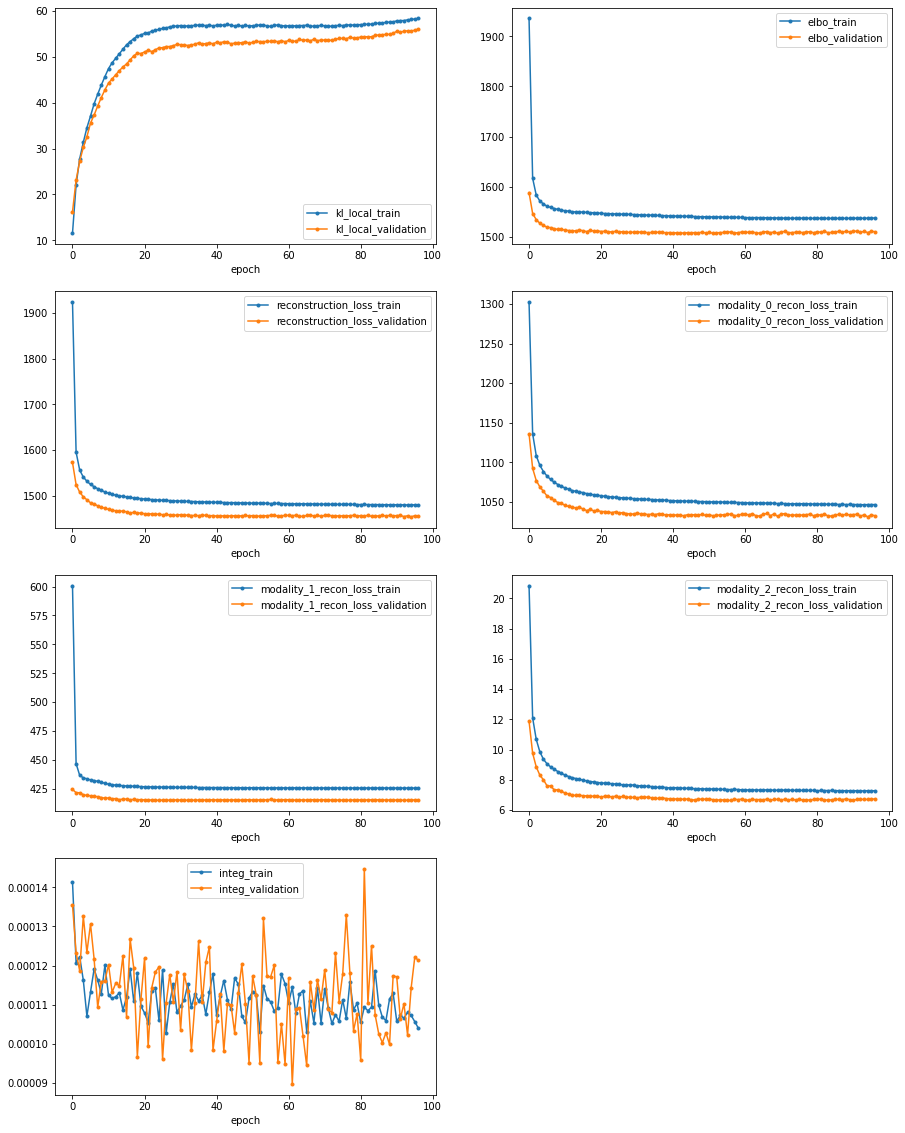

In [17]:
model.plot_losses()

In [18]:
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

In [19]:
sc.set_figure_params(dpi_save=300)

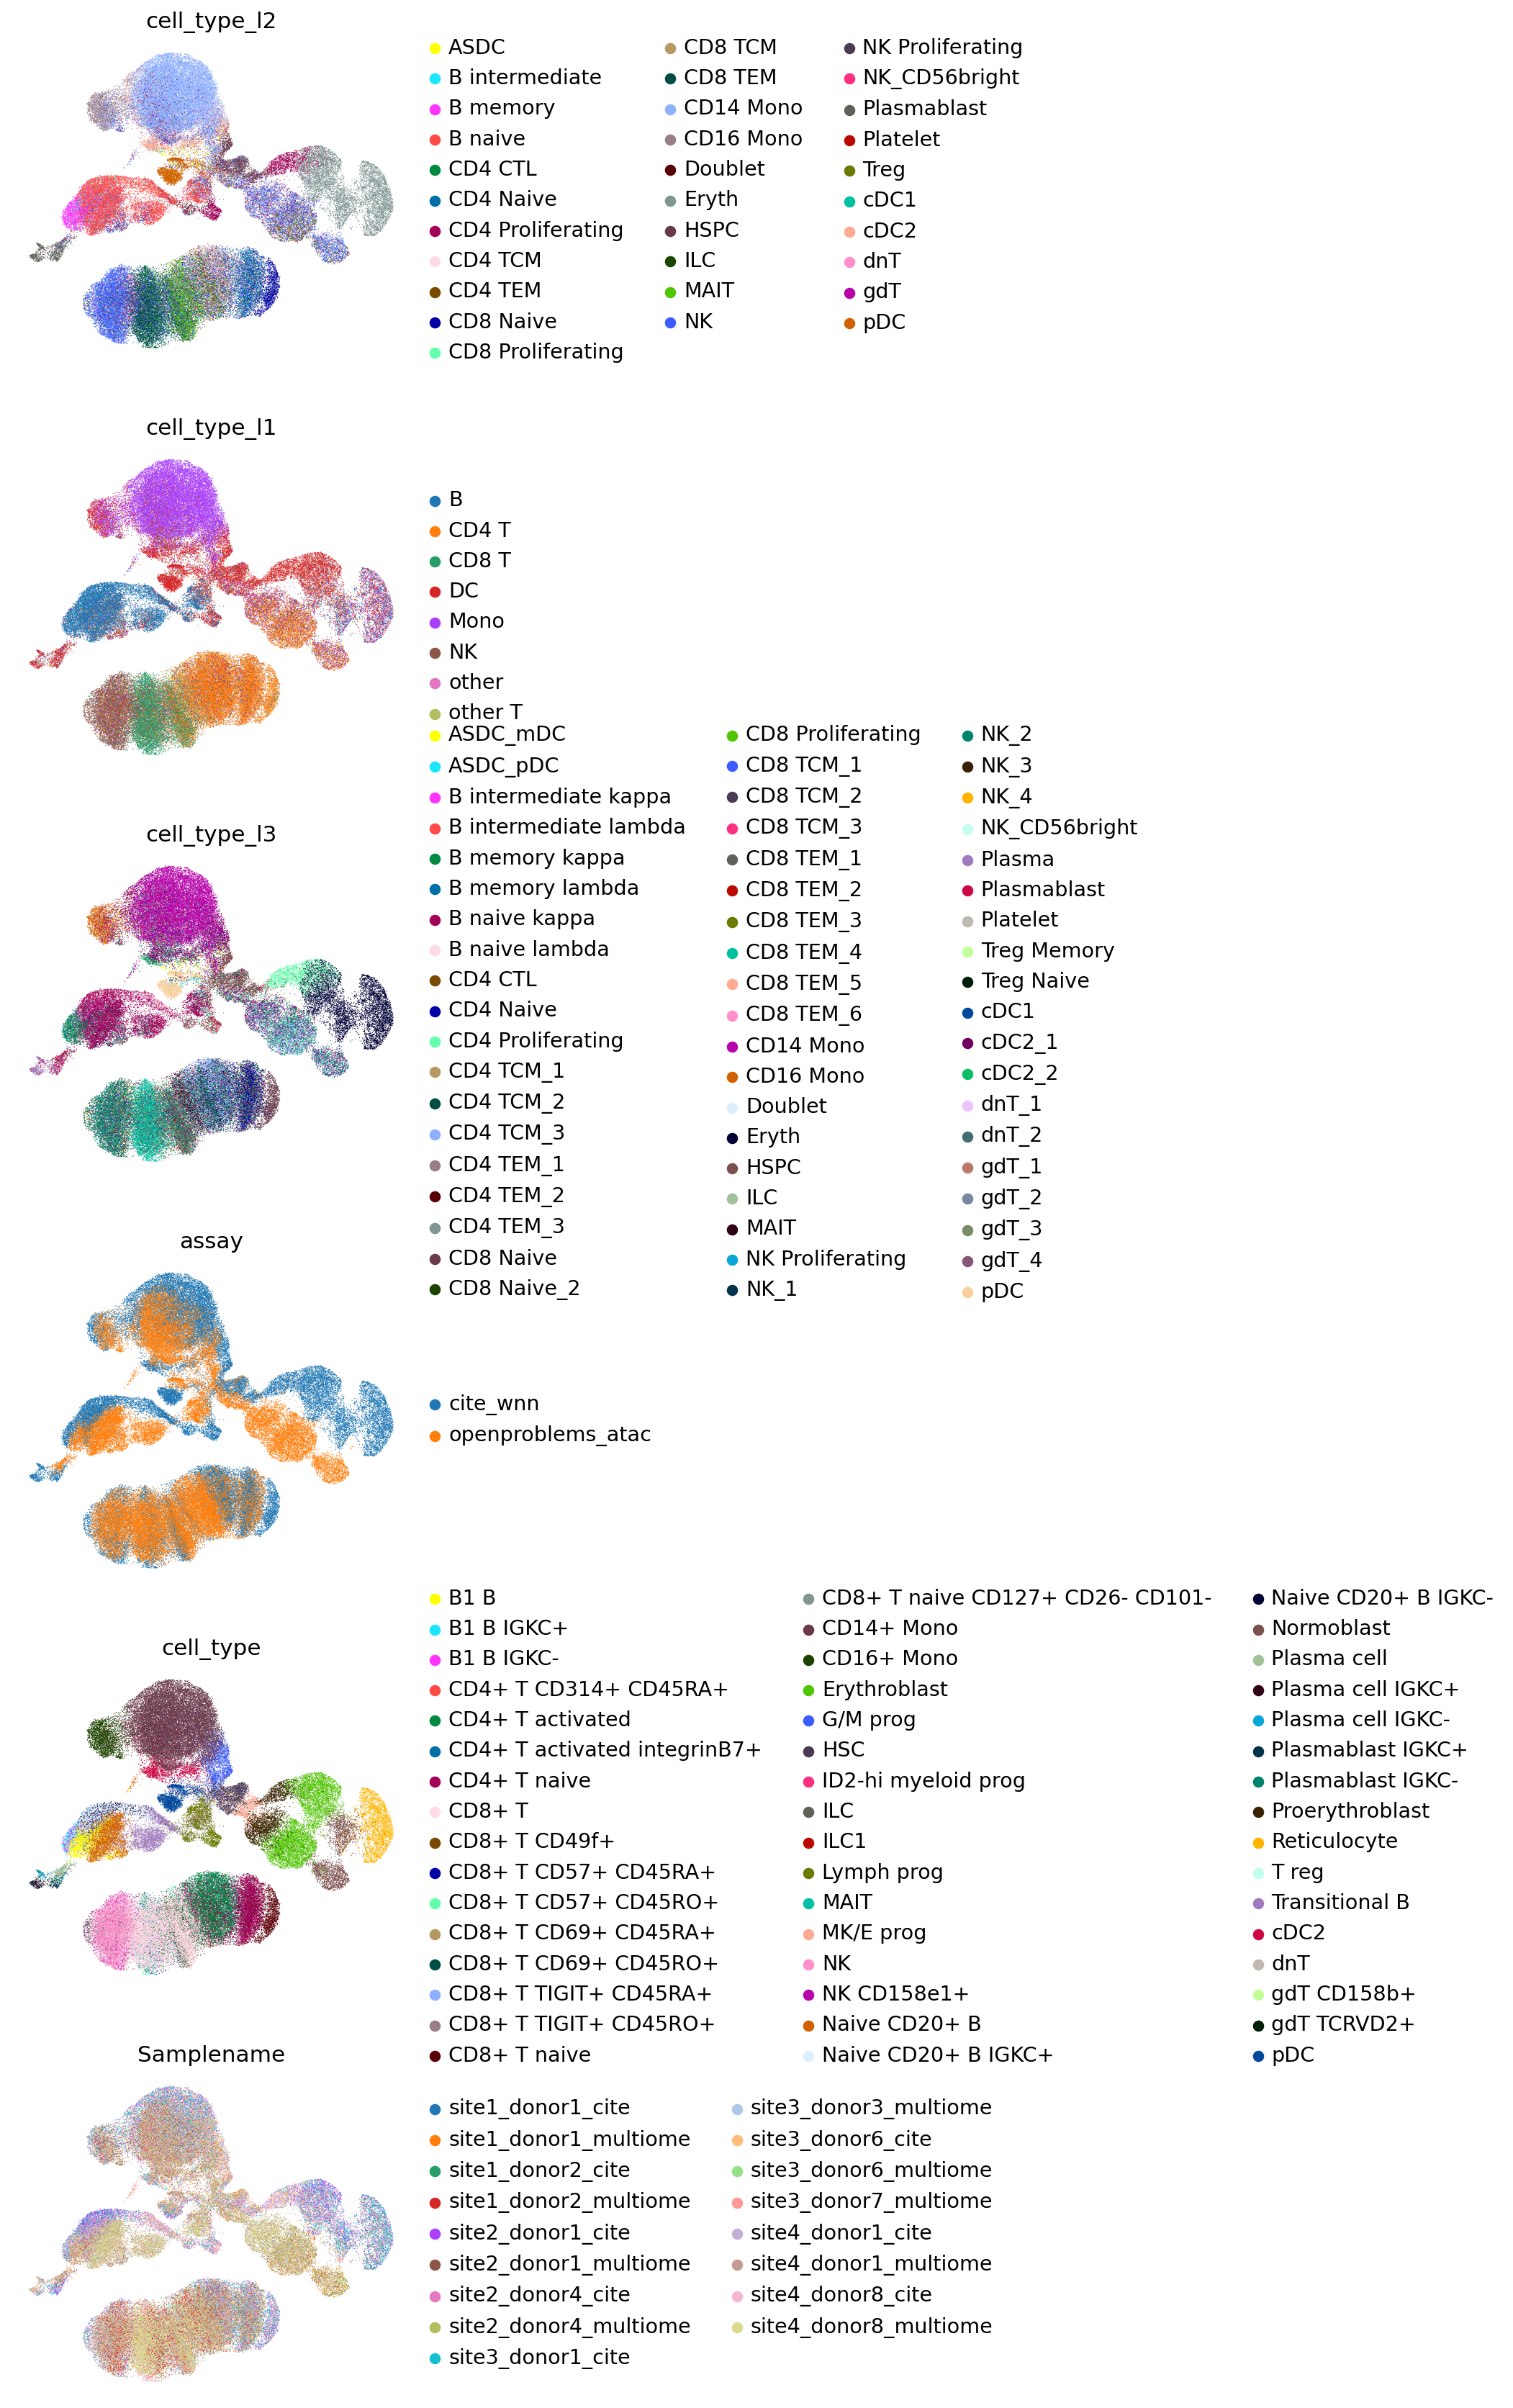

In [20]:
sc.pl.umap(adata, color=['cell_type_l2', 'cell_type_l1', 'cell_type_l3', 'assay', 'cell_type', 'Samplename'], ncols=1, frameon=False, save='_trimodal_latent.png')

In [21]:
model.save("multigrate_reference/", overwrite=True)

In [22]:
adata_ = sc.AnnData(adata.X)
adata_.obs = adata.obs.copy()
adata_.uns = adata.uns.copy()
adata_.obsm = adata.obsm.copy()
adata_.obsp = adata.obsp.copy()

In [23]:
adata_.write('adata_trimodal_ref.h5ad')